In [55]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
from sklearn.preprocessing import scale

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from PIL import Image

from matplotlib import pyplot as plt
import seaborn as sns

import graphviz
import pydotplus
import io
import imageio
from scipy import misc

%matplotlib inline

## Necessary libraries are imported.

In [2]:
db = pd.read_csv("carbon_nanotubes.csv", sep=';')

In [3]:
db.describe()

,Chiral indice n,Chiral indice m,Initial atomic coordinate u,Initial atomic coordinate v,Initial atomic coordinate w,Calculated atomic coordinates u',Calculated atomic coordinates v',Calculated atomic coordinates w'
count,10721.000000,10721.000000,10721.000000,10721.000000,10721.000000,10721.000000,10721.000000,10721.000000
mean,8.225725,3.337189,0.500064,0.500072,0.499637,0.500064,0.500072,0.499834
std,2.138919,1.683881,0.286524,0.286495,0.288503,0.290935,0.291012,0.289095
min,2.000000,1.000000,0.045149,0.045149,0.000061,0.038504,0.038930,0.000000
25%,7.000000,2.000000,0.218041,0.217594,0.249483,0.213364,0.212922,0.249242
50%,8.000000,3.000000,0.500181,0.500297,0.500057,0.500538,0.500020,0.499755
75%,10.000000,5.000000,0.781959,0.782709,0.749191,0.786588,0.787161,0.749463
max,12.000000,6.000000,0.954851,0.954851,0.999411,0.961496,0.961070,1.000000


In [4]:
db.head()

,Chiral indice n,Chiral indice m,Initial atomic coordinate u,Initial atomic coordinate v,Initial atomic coordinate w,Calculated atomic coordinates u',Calculated atomic coordinates v',Calculated atomic coordinates w'
0,2,1,0.679005,0.701318,0.017033,0.721039,0.730232,0.017014
1,2,1,0.717298,0.642129,0.231319,0.738414,0.656750,0.232369
2,2,1,0.489336,0.303751,0.088462,0.477676,0.263221,0.088712
3,2,1,0.413957,0.632996,0.040843,0.408823,0.657897,0.039796
4,2,1,0.334292,0.543401,0.159890,0.303349,0.558807,0.157373


In [5]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10721 entries, 0 to 10720
Data columns (total 8 columns):
Chiral indice n                     10721 non-null int64
Chiral indice m                     10721 non-null int64
Initial atomic coordinate u         10721 non-null float64
Initial atomic coordinate v         10721 non-null float64
Initial atomic coordinate w         10721 non-null float64
Calculated atomic coordinates u'    10721 non-null float64
Calculated atomic coordinates v'    10721 non-null float64
Calculated atomic coordinates w'    10721 non-null float64
dtypes: float64(6), int64(2)
memory usage: 670.2 KB


## The file with the csv extension was read and information about its content was shown.

In [6]:
train, test = train_test_split(db, test_size = 0.35, random_state = 13)

<font color=red>We add and select random_state number is prime.</font>

## From the total sample, it was determined how much part to use for the test.

In [7]:
print("TRAINING SIZE: {};TEST SIZE:{}".format(len(train), len(test)))

TRAINING SIZE: 6968;TEST SIZE:3753


In [8]:
c = DecisionTreeClassifier(min_samples_split=350, max_depth=32, criterion="entropy")

<font color=red>Also we add and select max_depth number and criterion. Because we want balanced tree</font>.

In [9]:
features=["Chiral indice m","Initial atomic coordinate u","Initial atomic coordinate v","Initial atomic coordinate w","Calculated atomic coordinates u'","Calculated atomic coordinates v'","Calculated atomic coordinates w'"]

In [10]:
X_train=train[features]
y_train=train["Chiral indice n"]

X_test=test[features]
y_test=test["Chiral indice n"]

In [11]:
dt = c.fit(X_train,y_train)

## The amount of sample that should be the minimum for a split to occur was determined. Then, the c constant was found with the decision tree classification. Training and test data were prepared for fitting.

In [12]:
def show_tree(tree,features,path):
    f = io.StringIO()
    export_graphviz(tree,out_file=f, feature_names=features),
    pydotplus.graph_from_dot_data(f.getvalue()).write_png(path)
    img= imageio.imread(path)
    plt.rcParams["figure.figsize"]= (20, 20)
    plt.imshow(img)

In [13]:
Image.MAX_IMAGE_PIXELS = None

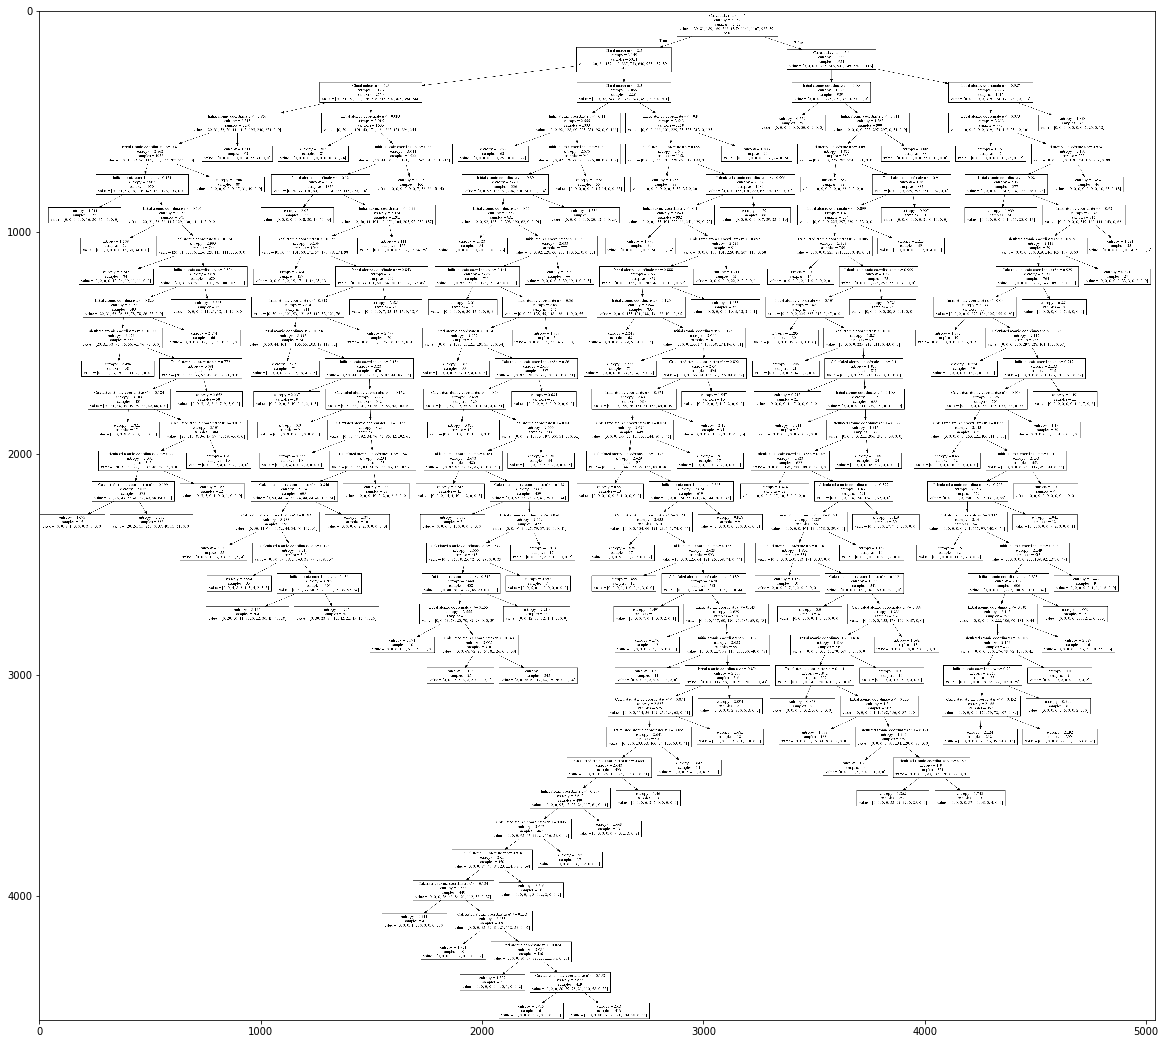

In [14]:
show_tree(dt, features,'dec_tree_01.png')


## Decision tree was drawn.

In [15]:
y_pred= c.predict(X_test)

In [16]:
y_pred

array([ 7,  7, 11, ...,  5,  5, 10], dtype=int64)

In [17]:
from sklearn.metrics import accuracy_score

score= accuracy_score(y_test, y_pred) * 100

In [18]:
print("ACCURACY_SCORE_USING_DECISION_TREE:",round(score,1),"%")

ACCURACY_SCORE_USING_DECISION_TREE: 34.2 %


In [19]:
report = classification_report(y_test, y_pred)

C:\Users\Ahmet\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [20]:
print(report)

              precision    recall  f1-score   support

           2       0.00      0.00      0.00         8
           3       0.25      0.02      0.04        47
           4       0.26      0.12      0.17        99
           5       0.37      0.39      0.38       259
           6       0.33      0.21      0.25       313
           7       0.37      0.63      0.47       757
           8       0.35      0.18      0.24       631
           9       0.29      0.24      0.26       582
          10       0.35      0.32      0.34       549
          11       0.27      0.73      0.39       194
          12       0.46      0.18      0.26       314

    accuracy                           0.34      3753
   macro avg       0.30      0.27      0.25      3753
weighted avg       0.35      0.34      0.32      3753



In [21]:
matrix = confusion_matrix(y_test, y_pred)
print(matrix)

[[  0   0   0   0   0   0   0   0   8   0   0]
 [  0   1   0   1   0   0   0   0  20  25   0]
 [  0   1  12   5   0   0  45   0  25  11   0]
 [  0   1  15 100   8  11  27  49  20  28   0]
 [  0   1   4  28  65 147  12  24  12  20   0]
 [  0   0   6  44  54 478  52  63  32  28   0]
 [  0   0   6  28  44 263 114  29  71  33  43]
 [  0   0   1  26  15 163  23 137 108  84  25]
 [  0   0   0  17   9 159  33  83 176  72   0]
 [  0   0   0  11   0  29   0  13   0 141   0]
 [  0   0   2   7   3  45  20  72  26  81  58]]


## Accuracy rate,confusion matrix and classification report found.

<font color=red>We want get 2 target m and n chiral indice.M and N are pair.They are determined conductivity</font>

In [22]:
from sklearn.linear_model import LogisticRegression

In [103]:
db_data= db.ix[:,(2,3,4,5,6,7)].values


C:\Users\Ahmet\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
C:\Users\Ahmet\Anaconda3\lib\site-packages\pandas\core\indexing.py:961: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  return getattr(section, self.name)[new_key]


NameError: name 'de_data' is not defined

In [104]:
print(db_data)

[[0.679005 0.701318 0.017033 0.721039 0.730232 0.017014]
 [0.717298 0.642129 0.231319 0.738414 0.65675  0.232369]
 [0.489336 0.303751 0.088462 0.477676 0.263221 0.088712]
 ...
 [0.923823 0.568913 0.819842 0.929403 0.576284 0.819879]
 [0.934978 0.602319 0.938889 0.941844 0.610608 0.938755]
 [0.953664 0.698374 0.962699 0.961243 0.707812 0.962605]]


In [100]:
target = db.ix[:,(0)].values

C:\Users\Ahmet\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In [105]:
A = scale(db_data)

In [106]:
LogReg= LogisticRegression(multi_class='multinomial',solver='lbfgs')
LogReg.fit(A, target)
print (LogReg.score(A,target))
target_pred=LogReg.predict(A)
print(classification_report(target,target_pred))


0.19848894692659266
              precision    recall  f1-score   support

           2       0.00      0.00      0.00        28
           3       0.00      0.00      0.00       128
           4       0.00      0.00      0.00       288
           5       0.00      0.00      0.00       719
           6       0.00      0.00      0.00       875
           7       0.20      1.00      0.33      2126
           8       0.00      0.00      0.00      1772
           9       0.25      0.00      0.00      1689
          10       0.00      0.00      0.00      1536
          11       0.00      0.00      0.00       588
          12       0.00      0.00      0.00       972

    accuracy                           0.20     10721
   macro avg       0.04      0.09      0.03     10721
weighted avg       0.08      0.20      0.07     10721



C:\Users\Ahmet\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
